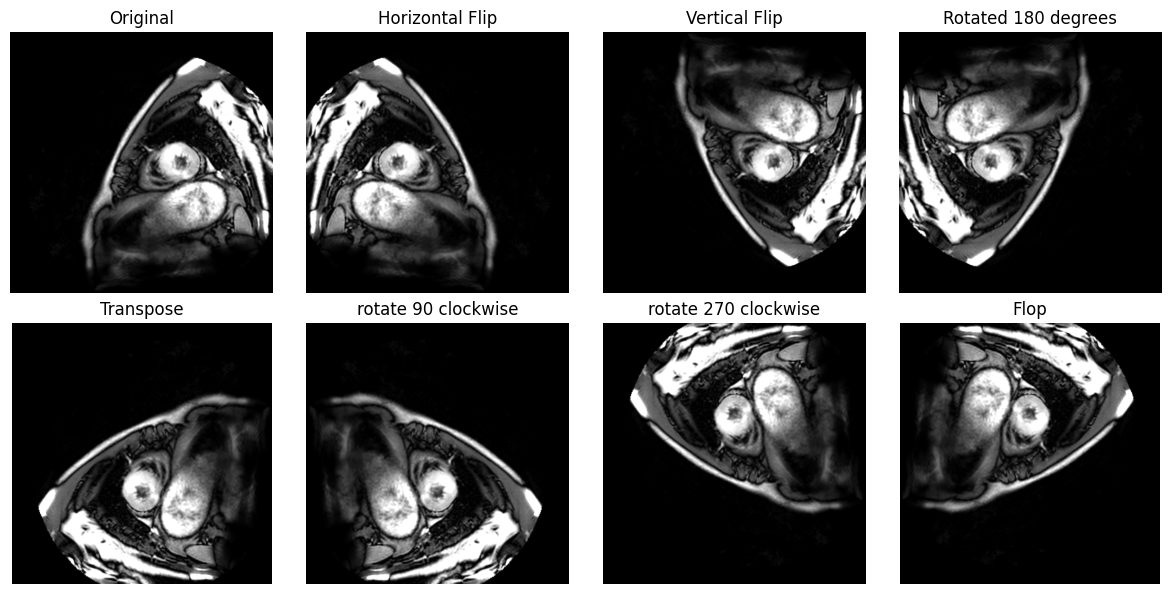

In [2]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

# 打开图像文件
image = Image.open('../dataset_2d_v2/T2/patient10_T2_slice_0.png')

# 将图像转换为灰度模式
image_gray = ImageOps.grayscale(image)

# 创建子图
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# 原始图像
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title('Original')

# 水平翻转
image_horizontal_flip = ImageOps.mirror(image_gray)
axes[0, 1].imshow(image_horizontal_flip, cmap='gray')
axes[0, 1].set_title('Horizontal Flip')

# 垂直翻转
image_vertical_flip = ImageOps.flip(image_gray)
axes[0, 2].imshow(image_vertical_flip, cmap='gray')
axes[0, 2].set_title('Vertical Flip')

# 旋转180度
image_rotated_180 = image_gray.rotate(180)
axes[0, 3].imshow(image_rotated_180, cmap='gray')
axes[0, 3].set_title('Rotated 180 degrees')

# 主对角线翻转
image_transpose = image_gray.transpose(Image.Transpose.ROTATE_90).transpose(Image.Transpose.FLIP_TOP_BOTTOM)
axes[1, 0].imshow(image_transpose, cmap='gray')
axes[1, 0].set_title('Transpose')

# 顺时针90度
image_rotated_75 = image_gray.rotate(270)
axes[1, 1].imshow(image_rotated_75, cmap='gray')
axes[1, 1].set_title('rotate 90 clockwise')

# 逆时针旋转90度
image_rotated_90 = image_gray.rotate(90)
axes[1, 2].imshow(image_rotated_90, cmap='gray')
axes[1, 2].set_title('rotate 270 clockwise')


# 副对角线翻转
image_flop = image_gray.transpose(Image.Transpose.ROTATE_270).transpose(Image.Transpose.FLIP_TOP_BOTTOM)
axes[1, 3].imshow(image_flop, cmap='gray')
axes[1, 3].set_title('Flop')




# 隐藏坐标轴
for ax in axes.ravel():
    ax.axis('off')

# 调整子图布局
plt.tight_layout()

# 显示图像
plt.show()


In [1]:
from PIL import Image
import matplotlib.pyplot as plt


# 打开图像文件
image = Image.open('..\dataset_2d\T2\patient10_T2_slice_0.png')

# 将图像转换为灰度模式
image_gray = ImageOps.grayscale(image)

# 创建子图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 原始图像
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title('Original')

# 主对角线翻转

# 对图像进行逆时针旋转90度
image_rotated = image.transpose(Image.Transpose.ROTATE_270)
# 对旋转后的图像进行主对角线翻转
image_diagonal_flipped = image_rotated.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
axes[1].imshow(image_diagonal_flipped, cmap='gray')
axes[1].set_title('Transpose')

plt.show()


NameError: name 'ImageOps' is not defined

In [5]:
from PIL import Image, ImageOps
def img_trans(img,type):
    if type==0: 
        return img
    elif type==1:
        return ImageOps.mirror(img)
    elif type ==2:
        return ImageOps.flip(img)
    elif type ==3:
        return img.rotate(180)
    elif type ==4:
        return img.transpose(Image.Transpose.ROTATE_90).transpose(Image.Transpose.FLIP_TOP_BOTTOM)
    elif type ==5:
        return img.rotate(270)
    elif type ==6:
        return img.rotate(90)
    elif type ==7:
        return img.transpose(Image.Transpose.ROTATE_270).transpose(Image.Transpose.FLIP_TOP_BOTTOM)
    else:
        print('error')
        return 0

In [7]:
import os
modality_list = ["C0","LGE","T2"]
# 输入包含NIfTI图像文件的文件夹路径
input_folder = '../dataset_2d_v2/T2'

# 输出PNG图像保存的文件夹路径
output_folder = '../dataset_trans_v2/T2'

# 确保输出文件夹存在，如果不存在则创建它
os.makedirs(output_folder, exist_ok=True)

# 遍历输入文件夹中的文件
for filename in os.listdir(input_folder):
    if filename.endswith('.png'):
        # 构建完整的文件路径
        input_filepath = os.path.join(input_folder, filename)
        # 打开图像文件
        image = Image.open(input_filepath)

        # 将图像转换为灰度模式
        image_gray = ImageOps.grayscale(image)
        
        for type in range(8):
            # 构建PNG文件的输出路径
            output_filename = os.path.splitext(filename)[0].split('.')[0]+f'_trans_{type}.png'
            
            img_trans(image_gray,type).save(os.path.join(output_folder, output_filename))
        
        # break
        